# 1. Preferential Attachment

In [12]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mc
import warnings
import math
import numpy as np
import pandas as pd
import powerlaw
import numpy as np

# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
N_values = [50, 100, 500, 1000, 5000]

barabasi_graphs = [nx.barabasi_albert_graph(n, m=3, seed=42) for n in N_values]
randomized_graphs = [nx.random_reference(g, connectivity=False, seed=42) for g in barabasi_graphs]

## 1.1

In [8]:
avg_clust = [nx.average_clustering(g) for g in barabasi_graphs]
avg_clust_rand = [nx.average_clustering(g) for g in randomized_graphs]

assortativity = [nx.degree_assortativity_coefficient(g) for g in barabasi_graphs]
assortativity_rand = [nx.degree_assortativity_coefficient(g) for g in randomized_graphs]

avg_shortest_path = [nx.average_shortest_path_length(g) for g in barabasi_graphs]
avg_shortest_path_rand = [nx.average_shortest_path_length(g) for g in randomized_graphs]

## 1.2

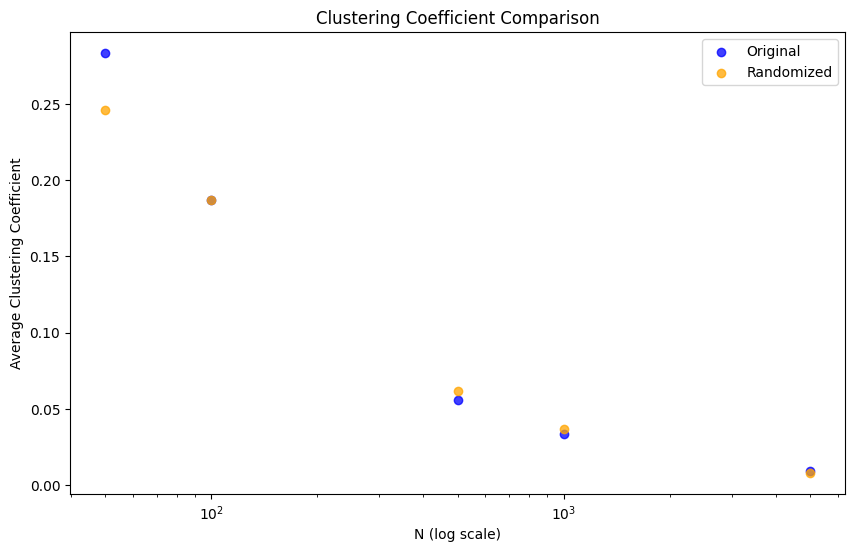

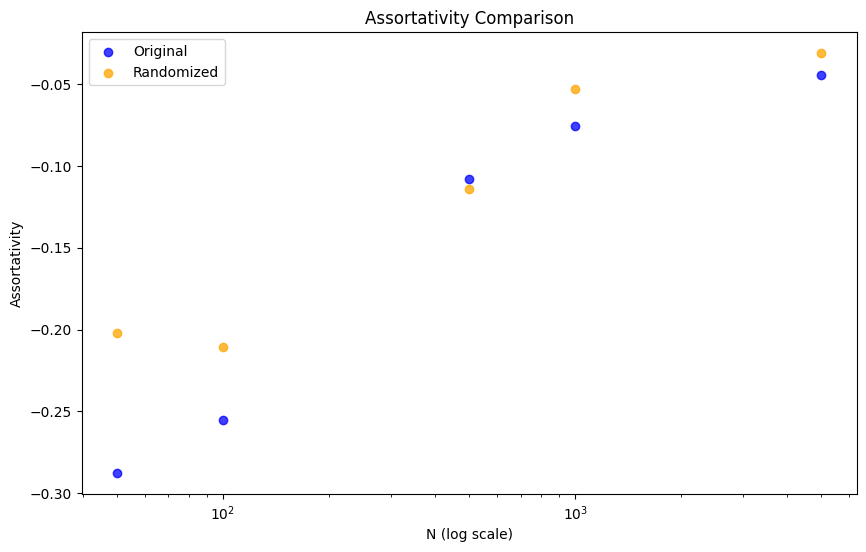

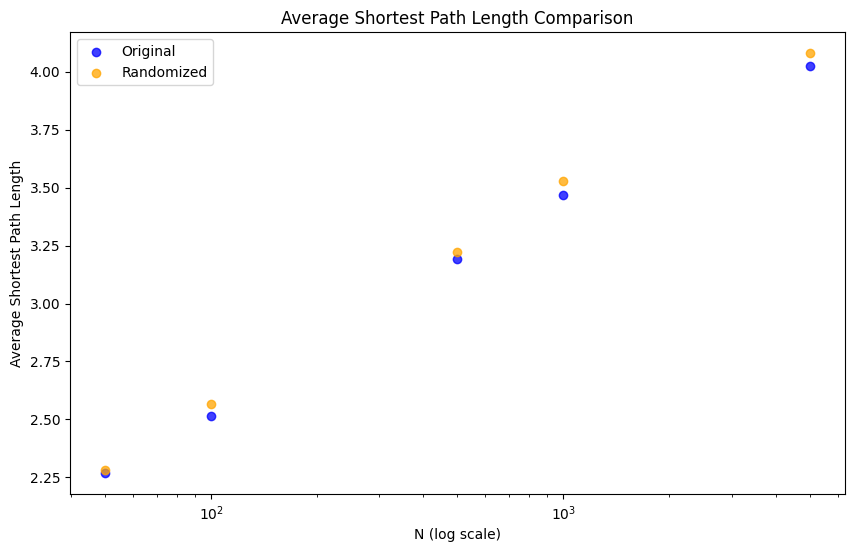

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(N_values, avg_clust, label='Original', color='blue', alpha=0.75)
plt.scatter(N_values, avg_clust_rand, label='Randomized', color='orange', alpha=0.75)
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Average Clustering Coefficient')
plt.legend()
plt.title('Clustering Coefficient Comparison')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(N_values, assortativity, label='Original', color='blue', alpha=0.75)
plt.scatter(N_values, assortativity_rand, label='Randomized', color='orange', alpha=0.75)
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Assortativity')
plt.legend()
plt.title('Assortativity Comparison')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(N_values, avg_shortest_path, label='Original', color='blue', alpha=0.75)
plt.scatter(N_values, avg_shortest_path_rand, label='Randomized', color='orange', alpha=0.75)
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Average Shortest Path Length')
plt.legend()
plt.title('Average Shortest Path Length Comparison')
plt.show()

## 1.3

TODO: add 3. (1 point) Which measures are relatively unchanged by randomization? Why?

# 2 Scale-free Distribution

In [13]:
gml_files = [f for f in os.listdir("datasets/") if f.endswith(".gml")]

graphs = {path.split(".")[0]: nx.read_gml(os.path.join("datasets/", path)) for path in gml_files}